In [1]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/home/jithendra/Documents/projects/zzz.../graduate_admission_prediction/data/Admission_Predict_Ver1.1.csv")

data = df.copy()

data = data.drop('Serial No.',axis=1)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(data, data["University Rating"]):
    train = data.loc[train_index]
    test = data.loc[test_index]

In [3]:
# seperating the target variable
X_train = train.drop('Chance of Admit ',axis=1)
y_train = train['Chance of Admit '].copy()
X_test = test.drop('Chance of Admit ',axis=1)
y_test = test['Chance of Admit '].copy()

In [4]:
print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (375, 7)
Shape of X_test : (125, 7)
Shape of y_train : (375,)
Shape of y_test : (125,)


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Selecting and Training Models

   - Linear Regression
   - Decision Tree
   - Random Forest
   - SVM regressor

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
sample_data = X_train.iloc[:5]
sample_labels = y_train.iloc[:5]

print("Prediction of samples: ", lr.predict(sample_data))

Prediction of samples:  [0.95997801 0.74570894 0.77200035 0.7636635  0.64410862]


In [8]:
print("Actual labels: ", list(sample_labels))

Actual labels:  [0.94, 0.78, 0.82, 0.78, 0.54]


In [9]:
predictions = lr.predict(X_train)
print("Linear Regression MSE (train): ", mean_squared_error(y_train,predictions))
print("Linear Regression RMSE (train): ", np.sqrt(mean_squared_error(y_train,predictions)))

Linear Regression MSE (train):  0.0036917944023019266
Linear Regression RMSE (train):  0.06076013826763338


### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [11]:
predictions = tree_reg.predict(X_train)
print("Decision Tree MSE(train): ", mean_squared_error(y_train,predictions))
print("Decision Tree RMSE(train): ", np.sqrt(mean_squared_error(y_train,predictions)))

Decision Tree MSE(train):  0.0
Decision Tree RMSE(train):  0.0


#### oh crap! The model is overfitted on the data!

#### Cross Validation 

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [13]:
scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
tree_reg_rmse_scores = np.sqrt(-scores)

tree_reg_rmse_scores

array([0.07481556, 0.09020445, 0.08471314, 0.09071355, 0.07520148,
       0.08213371, 0.09493953, 0.08058905, 0.10947047, 0.11980841])

In [14]:
print("Decision tree RMSE cross_val score: ", tree_reg_rmse_scores.mean())

Decision tree RMSE cross_val score:  0.0902589332922948


In [15]:
scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
lr_rmse_scores = np.sqrt(-scores)
print("Linear Regression RMSE cross_val score: ", lr_rmse_scores.mean())

Linear Regression RMSE cross_val score:  0.06178665338867775


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
scores = cross_val_score(rf_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
rf_reg_rmse_scores = np.sqrt(-scores)
print("Random Forest RMSE cross_val score: ", rf_reg_rmse_scores.mean())

Random Forest RMSE cross_val score:  0.06777006195140582


### Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [19]:
scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
ridge_rmse_scores = np.sqrt(-scores)
print("Ridge Regression RMSE cross_val score: ", ridge_rmse_scores.mean())

Ridge Regression RMSE cross_val score:  0.06179380166364383


### Comparing all the models at once on the test dataset

In [20]:
model_=[]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [22]:
lr = LinearRegression()  
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)
print("Linear Regression RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))
model_.append(['LinearRegression', np.sqrt(mean_squared_error(y_test,y_pred))])

ridge = Ridge()  
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
print("Ridge Regression RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))
model_.append(['RidgeRegression', np.sqrt(mean_squared_error(y_test,y_pred))])

lasso = Lasso()  
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
print("Lasso Regression RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))
model_.append(['LassoRegression', np.sqrt(mean_squared_error(y_test,y_pred))])

en = ElasticNet()  
en.fit(X_train_scaled,y_train)
y_pred = en.predict(X_test_scaled)
print("Elastic Net RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))
model_.append(['ElasticNet', np.sqrt(mean_squared_error(y_test,y_pred))])

knn = KNeighborsRegressor()  
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)
print("KNN RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))
model_.append(['KNN', np.sqrt(mean_squared_error(y_test,y_pred))])

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled,y_train)
y_pred = tree_reg.predict(X_test_scaled)
print("Decision Tree RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))
model_.append(['Decision Tree', np.sqrt(mean_squared_error(y_test,y_pred))])

svm = SVR()  
svm.fit(X_train_scaled,y_train)
y_pred = svm.predict(X_test_scaled)
print("SVM RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))
model_.append(['SVM', np.sqrt(mean_squared_error(y_test,y_pred))])

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled,y_train)
y_pred = rf_reg.predict(X_test_scaled)
print("Random Forest RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))
model_.append(['RandomForest', np.sqrt(mean_squared_error(y_test,y_pred))])

Linear Regression RMSE:  0.0563917121177774
Ridge Regression RMSE:  0.05637897431746669
Lasso Regression RMSE:  0.1406270023067326
Elastic Net RMSE:  0.1406270023067326
KNN RMSE:  0.06640361435946088
Decision Tree RMSE:  0.07879086241436883
SVM RMSE:  0.0703394434038292
Random Forest RMSE:  0.05769113554091305


In [23]:
models = pd.DataFrame(model_,columns=['Model', 'RMSE'])
models = models.sort_values(by=['RMSE'])
models=models.reset_index()
models

,index,Model,RMSE
0,1,RidgeRegression,0.056379
1,0,LinearRegression,0.056392
2,7,RandomForest,0.057691
3,4,KNN,0.066404
4,6,SVM,0.070339
5,5,Decision Tree,0.078791
6,2,LassoRegression,0.140627
7,3,ElasticNet,0.140627


[Text(0, 0, 'RidgeRegression'),
 Text(0, 0, 'LinearRegression'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'LassoRegression'),
 Text(0, 0, 'ElasticNet')]

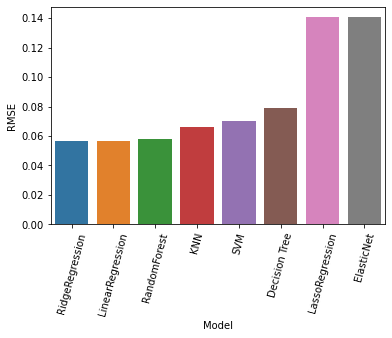

In [24]:
ax = sns.barplot(x = models.Model, y = models.RMSE)
ax.set_xticklabels(models.Model,rotation=75)

In [25]:
# finalizing the model and testing on the test data
final_model = ridge
final_predictions = final_model.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [26]:
final_rmse

0.05637897431746669

In [27]:
def predict_chance_of_admit(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    scaled_df = sc.transform(df)
    y_pred = model.predict(scaled_df)
    return y_pred

In [28]:
config={
    'GRE Score' : [315,320],
    'TOEFL Score' : [105,110],
    'University Rating' : [4,4],
    'SOP' : [4,3.5],
    'LOR ' : [4,3],
    'CGPA' : [9.5,9],
    'Research' : [1,0]
}

In [29]:
predict_chance_of_admit(config, final_model)

array([0.84829131, 0.76781761])

### Saving the model

In [30]:
import pickle

In [31]:
##saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [32]:
##loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)
    
predict_chance_of_admit(config, model)

array([0.84829131, 0.76781761])